<img src="championsleague.jpg" height="242">

# What Seasonal Domestic League Attribute Leads a Team Towards Champions League Success?
### Analyzing team and player attribute and performance from the 2008 - 2016 European top football (soccer) leagues
#### Author: Gustavo Guevara
***
## Introduction

The Champions League is the pinnacle of European football, where the best football clubs from the top leagues in Europe come together in this yearly tournament to decide the who the best team in the continent is. The tournament is considered to be one of the most prestigious in the world and the most illustrious club competition in Europe. The tournament is organized by the Union of European Football Associations (UEFA) and has been played, through multiple rebranding’s and restructurings, since 1955. The adaptation of the current tournament format was in 1992, when UEFA officially changed the competition’s name to be “UEFA Champions League” and since then have only modified the tournament to allow more teams to qualify for a chance at the prize. 

The competition is played concurrently each year with the European leagues and the way in which teams qualify for the tournament vary. Most of Europe’s national leagues can only have their domestic league’s champion enter the tournament, while the strongest leagues in the continent can now provide up to five teams each year for the tournament. Officially, the competition begins in late June when the preliminary rounds get underway. The winning teams advance to the three sets of qualifying rounds and a playoff-round, which all five distinct rounds are played over two legs or best of two combined games. Only six teams are able to qualify from these rounds to make it to the group stage of the tournament, where they are placed in a draw with the already prequalified twenty-six teams to be placed into eight groups. Each team now plays a total of six games within their group (playing each team in their group twice, home and away) and the top two teams from each group at the end of the six games (played from September to December) advance to the knockout phase of the contest. This round lasts from February to late May or early June where each round bar the final is played over two games. 

In this project, we will analyze the European football seasons of 2008 – 2016 to pinpoint what aspect of each year leads a team towards success in this tournament. We will examine team performances and statistics in their domestic leagues and the Champions League as well as individual player performances throughout each year. By the end of the project, we will hopefully be able to gain a better understanding of which of these aspects of a team’s domestic league season has the biggest impact on their success.
***
## Outline
1.	Setting Up
    - Library Requirements
    - Data Sources
    - Load and View the Data
    - Separate Champions League Winners
2.	Explore Data
    - Analyze Winning Teams’ Season Performance
3.  Analyze Team Dynamics from 
    - Isolate Champions League Winners
    - Relatedness of Team Dynamics
4. Player Analysis
    - Isolate Players for Winning Clubs 
    - Linear Regression Based on Players
5. Conclusions


***
## 1. Setting Up

### Library Requirements
For this project we will be utilizing the following Python libraries
 - <font color=green> Matplotlib.pyplot</font>: Ploting of data into charts and graphs
 - <font color=green> Pandas</font>: For data manipulation and analysis of tables and time series 
 - <font color=green> Scikit-Learn</font>: Machine Learning library
 - <font color=green> Seaborn</font>: For statistical data visualization based on Matplotlib 
 - <font color=green> SQLite</font>: 
 - <font color=green> Statsmodels</font>: For the use of statistical data exploration 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import sklearn as skl
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Data Sources
The dataset we will use for this project was obtained from Kaggle, where the metadata attached to the dataset describes the following attributes
- +25,000 matches (With more than 10,000 having detailed events)
- +10,000 players
- 11 European Countries and their top championship
- Player and Team attributes (From the FIFA franchise of Video Games)
- Team Lineups and formations
- Betting Odds

[Link](https://www.kaggle.com/hugomathien/soccer/data) to dataset

### Load and View the Data
Since the Kaggle page provides an SQLITE file, we will use Pandas to convert the contents to a Data Frame

In [2]:
sqlite_file = 'database.sqlite'
conn = sqlite3.connect(sqlite_file)

# Convert the SQLite tables to their equivalent dataframes
country_query = "SELECT * FROM Country"
country = pd.read_sql(country_query, conn)

league_query = "SELECT * FROM League"
league = pd.read_sql(league_query, conn)

match_query = "SELECT * FROM Match"
matches = pd.read_sql(match_query, conn)

player_query = "SELECT * FROM Player"
players = pd.read_sql(player_query, conn)

player_attrib_query = "SELECT * FROM Player_Attributes"
player_attribs = pd.read_sql(player_attrib_query, conn)

team_query = "SELECT * FROM Team"
teams = pd.read_sql(team_query, conn)

team_attrib_query = "SELECT * FROM Team_Attributes"
team_attribs = pd.read_sql(team_attrib_query, conn)

In [3]:
league.columns = ['id', 'country_id', 'league']
# Combine the countries dataframe with the leagues dataframe in orger to facilitate data interpretation
european_leagues = country.merge(league, how = 'inner', on = ['id'])
# Drop the unecessary column of country_id
european_leagues = european_leagues.drop(columns=['country_id'])

# Display the data corresponding to each of the tables
european_leagues

,id,name,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


In the above country data frame we are given the names of the countries corresponding to the leagues present within our data. Historically, the above 11 nations and their leagues have been considered the best out of the 55 full member nations/associations. 

In [4]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In the above data frame, we have each match played in the 11 leagues over the eight-year span of 2008 – 2016. Some of the key columns include the league_id, season, stage (round), home team, home team goals, away team, and away team goals among other columns. The columns that we will be utilizing the most are those mentioned above to calculate the season statistics for the Champions League winner of that year. 

In [5]:
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [6]:
player_attribs.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


The players data frame displays basic information about each player in the 11 leagues. The player_attributes table displays information on each player based on the statistics in that year’s edition of the popular FIFA franchise from EA. 

In [7]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
team_attribs.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


The team data frame displays important information such as the ids for other data frame calls, full name, and short name. Using these columns, we will be able to identify the appropriate team to analyze for the specified season/year. 
The team_attributes table contains information associated with each team based on the that year’s edition of the FIFA video game.

### Separate Champions League Winners

<img src="winners.jpg" height="242">
image source: https://i.imgur.com/6TJTM9K.jpg

From the above image, we can see that from 2008 to 2016 there were a total of five different winners of the annual tournament (we will exclude the 2008 winner as this corresponds to the 2007 – 2008 season, which is not present in our data):
-	FC Barcelona 2009
-	Inter Milan 2010 
-	FC Barcelona 2011
-	Chelsea FC 2012
-	FC Bayern Munich 2013
-	Real Madrid CF 2014
-	FC Barcelona 2015 
-	Real Madrid CF 2016

<img src="finals.png" height="242">
image source: https://en.wikipedia.org/wiki/List_of_European_Cup_and_UEFA_Champions_League_finals

Using this information, we can now isolate the data for these teams for the corresponding year/season for the purpose of analysis. 

In [9]:
# Isolate matches per season
bar09matches =  matches[(matches['season'] == '2008/2009') & ((matches['home_team_api_id'] == 8634) | (matches['away_team_api_id'] == 8634))]
int10matches =  matches[(matches['season'] == '2009/2010') & ((matches['home_team_api_id'] == 8636) | (matches['away_team_api_id'] == 8636))]
bar11matches =  matches[(matches['season'] == '2010/2011') & ((matches['home_team_api_id'] == 8634) | (matches['away_team_api_id'] == 8634))]
che12matches =  matches[(matches['season'] == '2011/2012') & ((matches['home_team_api_id'] == 8455) | (matches['away_team_api_id'] == 8455))]
bmu13matches =  matches[(matches['season'] == '2012/2013') & ((matches['home_team_api_id'] == 9823) | (matches['away_team_api_id'] == 9823))]
rea14matches =  matches[(matches['season'] == '2013/2014') & ((matches['home_team_api_id'] == 8633) | (matches['away_team_api_id'] == 8633))]
bar15matches =  matches[(matches['season'] == '2014/2015') & ((matches['home_team_api_id'] == 8634) | (matches['away_team_api_id'] == 8634))]
rea16matches =  matches[(matches['season'] == '2015/2016') & ((matches['home_team_api_id'] == 8633) | (matches['away_team_api_id'] == 8633))]

# For the purpose of analysis, we will look at the data frame for Barcelona in 2009
# We will remove the betting odds from the data frame as these will not be used for our analysis as well as some in game statistics that cannot be used
bar09matches = bar09matches.iloc[:, :-38]
bar09matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
21520,21521,21518,21518,2008/2009,1,2008-08-31 00:00:00,530086,8388,8634,1,...,33988.0,30661.0,30740.0,30738.0,39854.0,36615.0,30955.0,30981.0,33639.0,30626.0
21534,21535,21518,21518,2008/2009,10,2008-11-08 00:00:00,530240,8634,10281,6,...,37597.0,37672.0,38065.0,2790.0,33586.0,33588.0,33820.0,75192.0,33729.0,39142.0
21546,21547,21518,21518,2008/2009,11,2008-11-16 00:00:00,530252,8479,8634,0,...,33988.0,30740.0,37482.0,30661.0,154257.0,36615.0,39854.0,30981.0,33639.0,30626.0
21549,21550,21518,21518,2008/2009,12,2008-11-23 00:00:00,530255,8634,8305,1,...,37473.0,32675.0,37427.0,37468.0,41156.0,27420.0,37471.0,37461.0,37474.0,37469.0
21563,21564,21518,21518,2008/2009,13,2008-11-29 00:00:00,530329,8302,8634,0,...,33988.0,30740.0,37482.0,30661.0,39854.0,36615.0,26146.0,30981.0,33639.0,30626.0
21571,21572,21518,21518,2008/2009,14,2008-12-06 00:00:00,530337,8634,10267,4,...,34007.0,34029.0,30994.0,34575.0,30666.0,38701.0,37824.0,32761.0,41468.0,30909.0
21577,21578,21518,21518,2008/2009,15,2008-12-13 00:00:00,530343,8634,8633,2,...,30658.0,30649.0,34520.0,30962.0,30878.0,32765.0,18814.0,42714.0,25759.0,30655.0
21592,21593,21518,21518,2008/2009,16,2008-12-21 00:00:00,530358,10205,8634,1,...,33988.0,37482.0,30738.0,30661.0,39854.0,154257.0,26146.0,30981.0,33639.0,30626.0
21602,21603,21518,21518,2008/2009,17,2009-01-03 00:00:00,530368,8634,8661,3,...,24131.0,33849.0,33856.0,33861.0,38160.0,37631.0,38922.0,38398.0,37491.0,33028.0
21613,21614,21518,21518,2008/2009,18,2009-01-11 00:00:00,530379,8371,8634,2,...,33988.0,37482.0,30661.0,30738.0,39854.0,154257.0,26146.0,30981.0,33639.0,30626.0


Now we will do the same pruning of the data for the other data frames

In [10]:
int10matches = int10matches.iloc[:, :-38]
bar11matches = bar11matches.iloc[:, :-38]
che12matches = che12matches.iloc[:, :-38]
bmu13matches = bmu13matches.iloc[:, :-38]
rea14matches = rea14matches.iloc[:, :-38]
bar15matches = bar15matches.iloc[:, :-38]
rea16matches = rea16matches.iloc[:, :-38]

## 2. Explore Season Data

### Analyze Winning Teams’ Season Performance
With each individual season of the champions league winners now separated into their own individual data frame, we can now begin to explore the data of each of the matches played. Specifically, we will be analyzing how many games they won, tied, or lost during that season, as well as how many players they used during the span of their league during the championship run. We will begin by obtaining the record for each team's domestic league run.

In [11]:
# We will now tally up the league record for each team 
# Each team will have an index in a wins, ties, and loses array that we shall use for the purposes of plotting
record_wins = [0] * 8
record_ties = [0] * 8
record_losses = [0] * 8
# Obtain Barcelona 08/09 record
for index, row in bar09matches.iterrows():
    if (row['home_team_api_id'] == 8634):
        if (row['home_team_goal'] > row['away_team_goal']):
            record_wins[0] = record_wins[0] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[0] = record_ties[0] + 1
        else: 
            record_losses[0] = record_losses[0] + 1
    elif (row['away_team_api_id'] == 8634):
        if (row['home_team_goal'] < row['away_team_goal']):
            record_wins[0] = record_wins[0] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[0] = record_ties[0] + 1
        else: 
            record_losses[0] = record_losses[0] + 1
# Obtain Inter Milan 09/10 record
for index, row in int10matches.iterrows():
    if (row['home_team_api_id'] == 8636):
        if (row['home_team_goal'] > row['away_team_goal']):
            record_wins[1] = record_wins[1] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[1] = record_ties[1] + 1
        else: 
            record_losses[1] = record_losses[1] + 1
    elif (row['away_team_api_id'] == 8636):
        if (row['home_team_goal'] < row['away_team_goal']):
            record_wins[1] = record_wins[1] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[1] = record_ties[1] + 1
        else: 
            record_losses[1] = record_losses[1] + 1
# Obtain Barcelona 10/11 record
for index, row in bar11matches.iterrows():
    if (row['home_team_api_id'] == 8634):
        if (row['home_team_goal'] > row['away_team_goal']):
            record_wins[2] = record_wins[2] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[2] = record_ties[2] + 1
        else: 
            record_losses[2] = record_losses[2] + 1
    elif (row['away_team_api_id'] == 8634):
        if (row['home_team_goal'] < row['away_team_goal']):
            record_wins[2] = record_wins[2] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[2] = record_ties[2] + 1
        else: 
            record_losses[2] = record_losses[2] + 1
# Obtain Chelsea 11/12 record
for index, row in che12matches.iterrows():
    if (row['home_team_api_id'] == 8455):
        if (row['home_team_goal'] > row['away_team_goal']):
            record_wins[3] = record_wins[3] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[3] = record_ties[3] + 1
        else: 
            record_losses[3] = record_losses[3] + 1
    elif (row['away_team_api_id'] == 8455):
        if (row['home_team_goal'] < row['away_team_goal']):
            record_wins[3] = record_wins[3] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[3] = record_ties[3] + 1
        else: 
            record_losses[3] = record_losses[3] + 1
# Obtain Bayern Munich 12/13 record
for index, row in bmu13matches.iterrows():
    if (row['home_team_api_id'] == 9823):
        if (row['home_team_goal'] > row['away_team_goal']):
            record_wins[4] = record_wins[4] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[4] = record_ties[4] + 1
        else: 
            record_losses[4] = record_losses[4] + 1
    elif (row['away_team_api_id'] == 9823):
        if (row['home_team_goal'] < row['away_team_goal']):
            record_wins[4] = record_wins[4] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[4] = record_ties[4] + 1
        else: 
            record_losses[4] = record_losses[4] + 1
# Obtain Real Madrid 13/14 record
for index, row in rea14matches.iterrows():
    if (row['home_team_api_id'] == 8633):
        if (row['home_team_goal'] > row['away_team_goal']):
            record_wins[5] = record_wins[5] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[5] = record_ties[5] + 1
        else: 
            record_losses[5] = record_losses[5] + 1
    elif (row['away_team_api_id'] == 8633):
        if (row['home_team_goal'] < row['away_team_goal']):
            record_wins[5] = record_wins[5] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[5] = record_ties[5] + 1
        else: 
            record_losses[5] = record_losses[5] + 1
# Obtain Barcelona 14/15 record
for index, row in bar15matches.iterrows():
    if (row['home_team_api_id'] == 8634):
        if (row['home_team_goal'] > row['away_team_goal']):
            record_wins[6] = record_wins[6] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[6] = record_ties[6] + 1
        else: 
            record_losses[6] = record_losses[6] + 1
    elif (row['away_team_api_id'] == 8634):
        if (row['home_team_goal'] < row['away_team_goal']):
            record_wins[6] = record_wins[6] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[6] = record_ties[6] + 1
        else: 
            record_losses[6] = record_losses[6] + 1
# Obtain Real Madrid 15/16 record
for index, row in rea16matches.iterrows():
    if (row['home_team_api_id'] == 8633):
        if (row['home_team_goal'] > row['away_team_goal']):
            record_wins[7] = record_wins[7] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[7] = record_ties[7] + 1
        else: 
            record_losses[7] = record_losses[7] + 1
    elif (row['away_team_api_id'] == 8633):
        if (row['home_team_goal'] < row['away_team_goal']):
            record_wins[7] = record_wins[7] + 1
        elif (row['home_team_goal'] == row['away_team_goal']):
            record_ties[7] = record_ties[7] + 1
        else: 
            record_losses[7] = record_losses[7] + 1
# Now that we have the records for each team, we will tidy the data by placing it all in a single data frame
winner_ids = [8634, 8636, 8634, 8455, 9823, 8633, 8634, 8633]
season = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
dict = {'team_api_id': winner_ids, 'season': season, 'wins': record_wins, 'draws': record_ties, 'losses': record_losses}
records = pd.DataFrame(dict)
records

,team_api_id,season,wins,draws,losses
0,8634,2009,27,6,5
1,8636,2010,24,10,4
2,8634,2011,30,6,2
3,8455,2012,18,10,10
4,9823,2013,29,4,1
5,8633,2014,27,6,5
6,8634,2015,30,4,4
7,8633,2016,28,6,4


Now that we have each team’s domestic league record per their respective Champions League winning season, we can plot their records against each other to visualize a correlation.

__Disclaimer:__ The German Bundesliga, only having 18 teams participate per year, has a total of 34 matches per season in comparison to those of England, Italy, and Spain who have 20 participating teams and 38 matches per season 


Text(0.5, 1.0, 'Record (y-axis) vs. Champions League Winning Season (x-axis)')

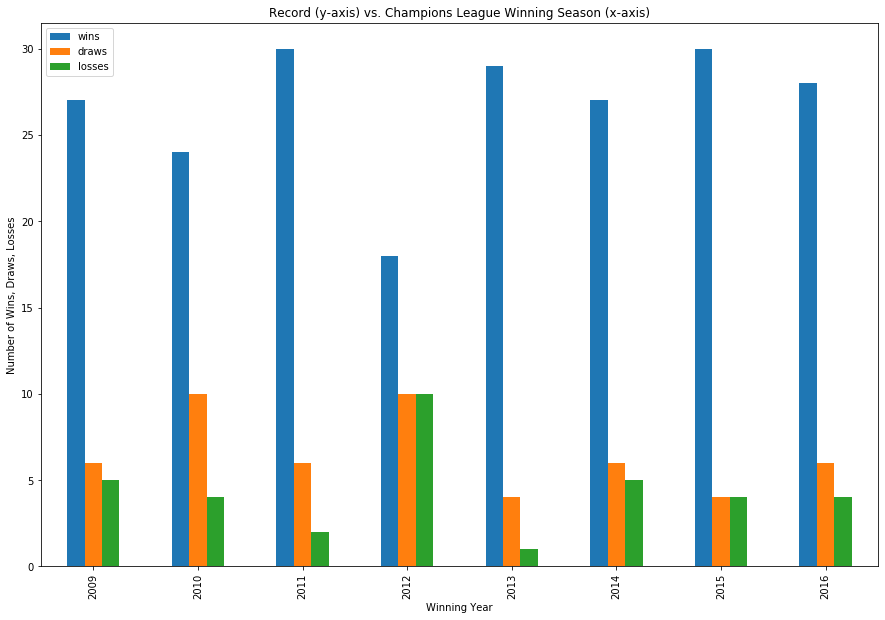

In [12]:
# We will now make four different plots, one bar plot and three scatter plots, to visualize our data
records.plot(x="season", y=["wins", "draws", "losses"], figsize=(15, 10), kind="bar")
plt.legend(loc='upper left')
plt.ylabel('Number of Wins, Draws, Losses')
plt.xlabel('Winning Year')
plt.title('Record (y-axis) vs. Champions League Winning Season (x-axis)')

For the purposes of comparison, we will also be plotting the wins, draws and losses for the overall 299 teams in our dataset.

In [132]:
# Function that will get the appropriate index for the team in the Teams dataframe
def getID(team_api):
    return teams[teams['team_api_id'] == team_api].index.values.astype(int)[0]

overall_wins = [0] * 299
overall_ties = [0] * 299
overall_losses = [0] * 299
# Iterate through the matches and obtain the record for each team over the 8 seasons
for index, row in matches.iterrows():
    if (row['home_team_goal'] > row['away_team_goal']):
            overall_wins[getID(row['home_team_api_id'])] = overall_wins[getID(row['home_team_api_id'])] + 1
            overall_losses[getID(row['away_team_api_id'])] = overall_losses[getID(row['away_team_api_id'])] + 1
    elif (row['home_team_goal'] == row['away_team_goal']):
        overall_ties[getID(row['home_team_api_id'])] = overall_ties[getID(row['home_team_api_id'])] + 1
        overall_ties[getID(row['away_team_api_id'])] = overall_ties[getID(row['away_team_api_id'])] + 1
    else: 
        overall_wins[getID(row['away_team_api_id'])] = overall_wins[getID(row['away_team_api_id'])] + 1
        overall_losses[getID(row['home_team_api_id'])] = overall_losses[getID(row['home_team_api_id'])] + 1
# Now we will average over the 8 seasons        
average_wins = list(map(lambda i: i / 8, overall_wins))
average_ties = list(map(lambda i: i / 8, overall_ties))
average_losses = list(map(lambda i: i / 8, overall_losses))

In [137]:
# Now we will place our three lists into a dataframe
average_dict = {'team_api_id': teams['team_api_id'], 'wins': average_wins, 'draws': average_ties, 'losses': average_losses}
average_records = pd.DataFrame(average_dict)
average_records

,team_api_id,wins,draws,losses
0,9987,12.125,6.875,7.500
1,9993,5.000,5.250,8.750
2,10000,9.750,7.750,9.000
3,9994,9.250,8.500,8.750
4,9984,7.250,4.250,11.250
...,...,...,...,...
294,10190,9.000,6.250,11.750
295,10191,8.875,8.500,9.375
296,9777,2.500,1.750,4.500
297,7730,2.875,2.250,8.125


[Text(0, 0.5, 'Wins in Season'),
 Text(0.5, 0, 'Team'),
 Text(0.5, 1.0, 'Wins (y-axis) vs. Teams (x-axis)')]

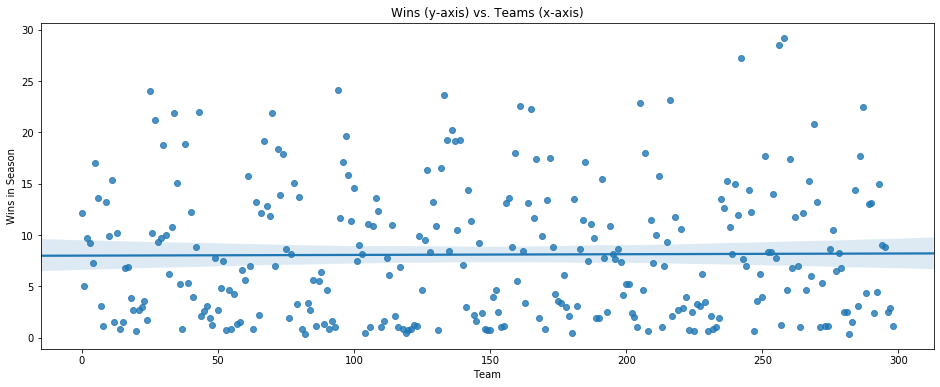

In [142]:
# Make a scatter plot to visualize our averages data for the wins
plt.figure(figsize=(16, 6))
average_wins_plot = sns.regplot(average_records.index.values.tolist(), average_records['wins'])
average_wins_plot.set(xlabel='Team', ylabel='Wins in Season', 
              title= 'Wins (y-axis) vs. Teams (x-axis)')

[Text(0, 0.5, 'Wins in Season'),
 Text(0.5, 0, 'Winning Year'),
 Text(0.5, 1.0, 'Wins (y-axis) vs. Champions League Winning Season (x-axis)')]

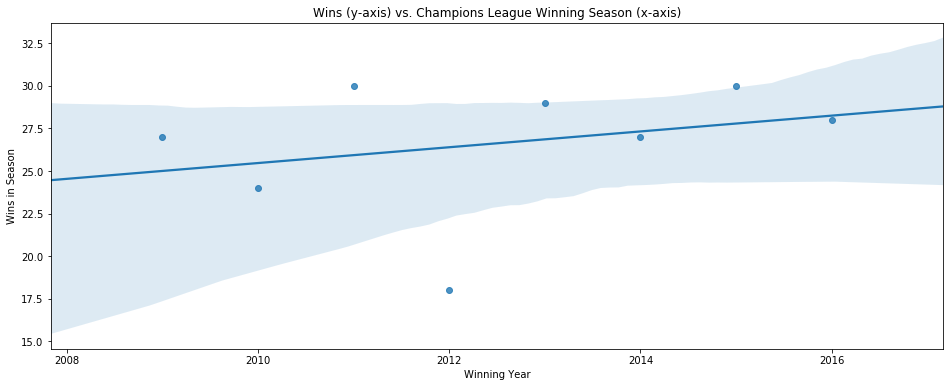

In [143]:
# Scatter plot for wins for Champions League Winners
plt.figure(figsize=(16, 6))
wins_plot = sns.regplot(records['season'], records['wins'])
wins_plot.set(xlabel='Winning Year', ylabel='Wins in Season', 
              title= 'Wins (y-axis) vs. Champions League Winning Season (x-axis)')

[Text(0, 0.5, 'Draws in Season'),
 Text(0.5, 0, 'Team'),
 Text(0.5, 1.0, 'Draws (y-axis) vs. Teams (x-axis)')]

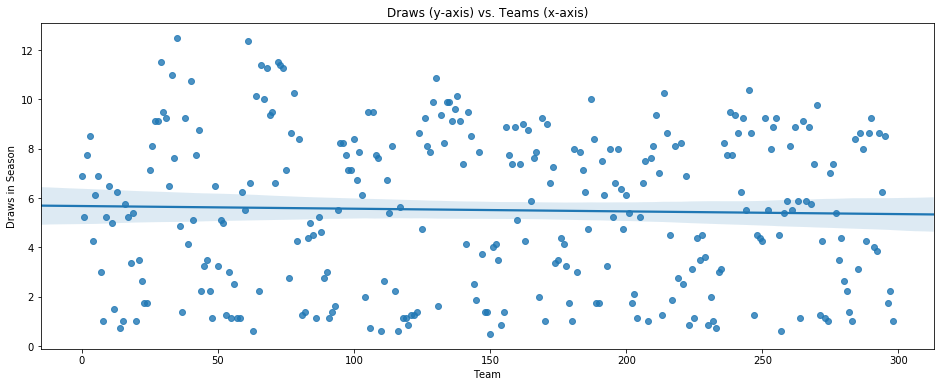

In [144]:
# Make a scatter plot to visualize our averages data for the draws
plt.figure(figsize=(16, 6))
average_draws_plot = sns.regplot(average_records.index.values.tolist(), average_records['draws'])
average_draws_plot.set(xlabel='Team', ylabel='Draws in Season', 
              title= 'Draws (y-axis) vs. Teams (x-axis)')

[Text(0, 0.5, 'Draws in Season'),
 Text(0.5, 0, 'Winning Year'),
 Text(0.5, 1.0, 'Draws (y-axis) vs. Champions League Winning Season (x-axis)')]

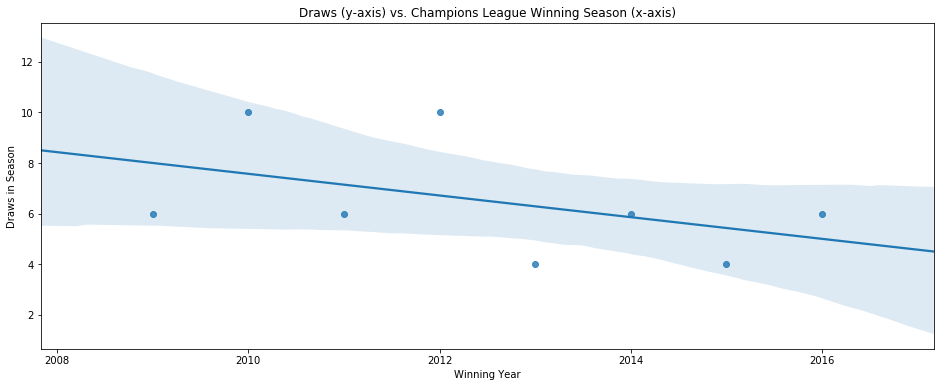

In [145]:
# Make a scatter plot to visualize the draws for the Champions League Winners
plt.figure(figsize=(16, 6))
draws_plot = sns.regplot(records['season'], records['draws'])
draws_plot.set(xlabel='Winning Year', ylabel='Draws in Season', 
               title= 'Draws (y-axis) vs. Champions League Winning Season (x-axis)')

[Text(0, 0.5, 'Losses in Season'),
 Text(0.5, 0, 'Team'),
 Text(0.5, 1.0, 'Losses (y-axis) vs. Teams (x-axis)')]

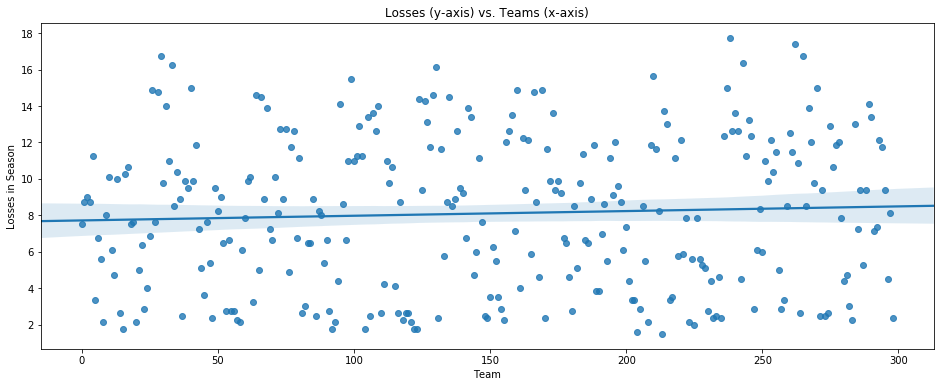

In [146]:
# Make a scatter plot to visualize our averages data for the losses
plt.figure(figsize=(16, 6))
average_losses_plot = sns.regplot(average_records.index.values.tolist(), average_records['losses'])
average_losses_plot.set(xlabel='Team', ylabel='Losses in Season', 
              title= 'Losses (y-axis) vs. Teams (x-axis)')

[Text(0, 0.5, 'Losses in Season'),
 Text(0.5, 0, 'Winning Year'),
 Text(0.5, 1.0, 'Losses (y-axis) vs. Champions League Winning Season (x-axis)')]

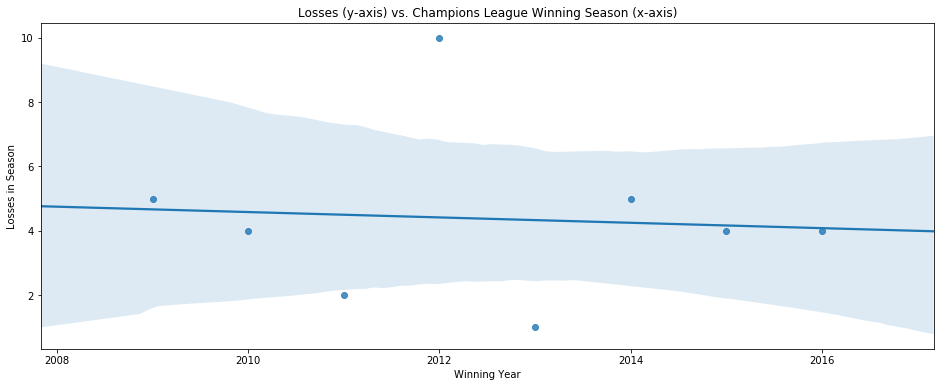

In [147]:
# Make a scatter plot to visualize the losses for the Champions League Winners
plt.figure(figsize=(16, 6))
losses_plot = sns.regplot(records['season'], records['losses'])
losses_plot.set(xlabel='Winning Year', ylabel='Losses in Season', 
                title= 'Losses (y-axis) vs. Champions League Winning Season (x-axis)')

**Observations**: From the above plots we can now gain a visual understanding of how a team’s performance throughout their domestic campaign correlates to their winning performance in the Champions League. From the trends present, we can observe that:
-	The number of wins that a team obtains domestically tends to increase as they win the continental tournament 
-	The number of draws trends downwards, however, tends stay around the same value per year
-	The number of losses, like that of draws, has a negative slope yet remains around a similar value

With the data now accumulated, we can also take averages from our data frame to further corroborate the visual elements displayed on our plot.

In [14]:
records.describe()

,team_api_id,season,wins,draws,losses
count,8.000000,8.00000,8.000000,8.000000,8.00000
mean,8760.250000,2012.50000,26.625000,6.500000,4.37500
std,433.961075,2.44949,3.997767,2.329929,2.66927
min,8455.000000,2009.00000,18.000000,4.000000,1.00000
25%,8633.000000,2010.75000,26.250000,5.500000,3.50000
50%,8634.000000,2012.50000,27.500000,6.000000,4.00000
75%,8634.500000,2014.25000,29.250000,7.000000,5.00000
max,9823.000000,2016.00000,30.000000,10.000000,10.00000


Analyzing the statistics table, we can see that on average teams over these eight seasons obtained around 27 wins, 7 draws, and 4 losses domestically. These numbers stand out even more when we analyze the averages for all the teams over the eight seasons.

In [148]:
average_records.describe()

,team_api_id,wins,draws,losses
count,299.000000,299.000000,299.00000,299.000000
mean,12340.521739,8.103261,5.51505,8.103261
std,25940.411135,6.475346,3.14360,4.139357
min,1601.000000,0.375000,0.50000,1.500000
25%,8349.000000,2.500000,2.62500,4.500000
50%,8655.000000,7.000000,5.50000,8.250000
75%,9886.500000,12.187500,8.18750,11.500000
max,274581.000000,29.250000,12.50000,17.750000


Evaluating the means for the average record of each team over the 8 seasons, we can see that the wins amount to 8, draws to 6, and losses to 8. In comparing these values to those obtained from the Champions League winners, we can safely infer that, in order to obtain success in the European continent’s premier tournament, a team must mirror such success within their league. 

Now that we have a better understanding of how well a team has to perform during their regular season, let us analyze what is required of their team dynamic
***
## 3. Analyze Team Dynamics
From our original data frames, we are able to see the official FIFA classifications for each team based on the analysis made for the yearly video game series. The data frame *Team_Attribs* gives us the team statistics we need per date which updates were made to the video games. Even though these updates/patches tend to occur around every month, our dataset contains the information of the February updates to each team. We will begin by isolating the information for the same teams as before.
### Isolate Champions League Winners
To refresh our memory, we shall look at the *Team_Attribs* once more here to gain a better understanding of the sort of data that we shall be working with

In [15]:
team_attribs.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Upon a deeper inspection of the data offered by our data frame, we can see that we have some missing data for Barcelona 2009 and Bayern Munich 2013. Since the data set only beings on dates corresponding to the 2010 season, the Barcelona 2009 data can be considered MNAR while that of Bayern Munich in 2013 can be considered as MAR. To offset this, we will inject substitute values that are most likely to resemble these missing values (in our case, the update that is closest to the season in which the team won the Champions League). Since there is only one update per season, we can isolate each team’s attributes based on the date of their respective winning season’s update for the video game.

In [16]:
# Create a data frame for the Champions League winners attributes for their respective winning season
winner_attribs = team_attribs[(team_attribs['team_api_id'] == 8634) & (team_attribs['date'] == '2010-02-22 00:00:00')]
winner_attribs = winner_attribs.append(team_attribs[(team_attribs['team_api_id'] == 8636) & (team_attribs['date'] == '2010-02-22 00:00:00')])
winner_attribs = winner_attribs.append(team_attribs[(team_attribs['team_api_id'] == 8634) & (team_attribs['date'] == '2011-02-22 00:00:00')])
winner_attribs = winner_attribs.append(team_attribs[(team_attribs['team_api_id'] == 8455) & (team_attribs['date'] == '2012-02-22 00:00:00')])
winner_attribs = winner_attribs.append(team_attribs[(team_attribs['team_api_id'] == 9823) & (team_attribs['date'] == '2013-09-20 00:00:00')])
winner_attribs = winner_attribs.append(team_attribs[(team_attribs['team_api_id'] == 8633) & (team_attribs['date'] == '2013-09-20 00:00:00')])
winner_attribs = winner_attribs.append(team_attribs[(team_attribs['team_api_id'] == 8634) & (team_attribs['date'] == '2014-09-19 00:00:00')])
winner_attribs = winner_attribs.append(team_attribs[(team_attribs['team_api_id'] == 8633) & (team_attribs['date'] == '2015-09-10 00:00:00')])
# Display the information for our selected teams
pd.set_option('display.max_columns', 25)
winner_attribs

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
118,119,241,8634,2010-02-22 00:00:00,42,Balanced,NaN,Little,30,Short,Free Form,65,Normal,40,Normal,70,Lots,Free Form,70,High,30,Contain,70,Wide,Offside Trap
607,608,44,8636,2010-02-22 00:00:00,55,Balanced,NaN,Little,55,Mixed,Free Form,50,Normal,55,Normal,70,Lots,Organised,50,Medium,60,Press,55,Normal,Cover
119,120,241,8634,2011-02-22 00:00:00,43,Balanced,NaN,Little,34,Mixed,Free Form,59,Normal,25,Little,68,Lots,Free Form,67,High,43,Press,68,Wide,Cover
308,309,5,8455,2012-02-22 00:00:00,60,Balanced,NaN,Little,45,Mixed,Organised,55,Normal,45,Normal,45,Normal,Organised,60,Medium,62,Press,46,Normal,Cover
145,146,21,9823,2013-09-20 00:00:00,56,Balanced,NaN,Little,41,Mixed,Organised,40,Normal,44,Normal,39,Normal,Organised,52,Medium,54,Press,52,Normal,Cover
1051,1052,243,8633,2013-09-20 00:00:00,50,Balanced,NaN,Little,41,Mixed,Organised,68,Risky,54,Normal,72,Lots,Free Form,39,Medium,49,Press,65,Normal,Cover
122,123,241,8634,2014-09-19 00:00:00,35,Balanced,35.0,Normal,32,Short,Free Form,37,Normal,31,Little,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
1053,1054,243,8633,2015-09-10 00:00:00,50,Balanced,57.0,Normal,46,Mixed,Free Form,61,Normal,41,Normal,63,Normal,Free Form,52,Medium,60,Press,63,Normal,Cover


Having now separated our desired teams, we can begin to look at the information that we have acquired. In this new data frame, we can see that our winning teams have similar descriptors when it comes to their team set ups. Some common columns include:
-	buildUpPlaySpeedClass -> Balanced 
-	chanceCreationPassingClass -> Normal (With the exception of Real Madrid in 2014)
-	defenceAggressionClass -> Press (With the exception of Barcelona 2009)
-	defenceDefenderLineClass -> Cover (With the exception of Barcelona 2009)

The other descriptor columns, like those of buildUpPlayDribblingClass or chanceCreationPositioningClass, are not all similar but do only have two values for these teams. These commonalities in the way which the teams are set up in the video game are meant to mirror their real-life counterparts on the field. With similar set-up descriptors, let us now look at how the numbers line up.

In [17]:
# Reset the maximum number of rows so that our large tables do not display all their information later on
pd.reset_option('display.max_columns')
winner_attribs.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,8.000000,8.000000,8.000000,8.00000,2.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,441.375000,159.875000,8760.250000,48.87500,46.000000,40.500000,54.375000,41.875000,57.750000,56.375000,52.625000,60.500000
std,412.185096,113.554817,433.961075,8.35699,15.556349,8.332381,11.287635,10.287822,15.434192,10.098621,11.488348,8.502101
min,119.000000,5.000000,8455.000000,35.00000,35.000000,30.000000,37.000000,25.000000,35.000000,39.000000,30.000000,46.000000
25%,122.250000,38.250000,8633.000000,42.75000,40.500000,33.500000,47.500000,37.750000,43.500000,51.500000,47.500000,54.250000
50%,227.500000,241.000000,8634.000000,50.00000,46.000000,41.000000,57.000000,42.500000,65.500000,56.000000,57.000000,64.000000
75%,719.000000,241.500000,8634.500000,55.25000,51.500000,45.250000,62.000000,47.250000,70.000000,62.500000,60.500000,65.750000
max,1054.000000,243.000000,9823.000000,60.00000,57.000000,55.000000,68.000000,55.000000,72.000000,70.000000,63.000000,70.000000


These numbers are paired up with their descriptor classes in order for them to make sense in the analysis of how a team plays, where buildUpPlaySpeed would match up to the descriptor in buildUpPlaySpeedClass and buildUpPlayPassing with buildUpPlayPassingClass and so on. What we would like to now see is how related these attributes are to each other. 

### Relatedness of Team Dynamics

In order for us to be able to visualize how each of these categories relate to one another for a winning formula, we will need to make a separate data frame where we have only the columns that we need. We will exclude buildUpPlayDribbling from our analysis as this category only has two data points that can be used. 

In [18]:
# We will begin by merging the record dataframe to that of the winner attributes dataframe 
# so that we can have one dataframe for our analysis
attrib_corr = winner_attribs[['buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 
                              'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']]
attrib_corr = attrib_corr.corr()
attrib_corr

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
buildUpPlaySpeed,1.000000,0.774462,0.062660,0.674405,-0.008030,-0.464868,0.344651,-0.843447
buildUpPlayPassing,0.774462,1.000000,-0.028100,0.714102,0.161071,-0.615430,0.597692,-0.645292
chanceCreationPassing,0.062660,-0.028100,1.000000,0.202214,0.827997,-0.074098,-0.563904,0.405639
chanceCreationCrossing,0.674405,0.714102,0.202214,1.000000,0.270583,-0.747508,0.206236,-0.451593
chanceCreationShooting,-0.008030,0.161071,0.827997,0.270583,1.000000,-0.130379,-0.547658,0.484453
defencePressure,-0.464868,-0.615430,-0.074098,-0.747508,-0.130379,1.000000,-0.432051,0.267048
defenceAggression,0.344651,0.597692,-0.563904,0.206236,-0.547658,-0.432051,1.000000,-0.623788
defenceTeamWidth,-0.843447,-0.645292,0.405639,-0.451593,0.484453,0.267048,-0.623788,1.000000


With our newly created matrix, we can now see where it is that these five teams find their best combinations  

<function matplotlib.pyplot.show(*args, **kw)>

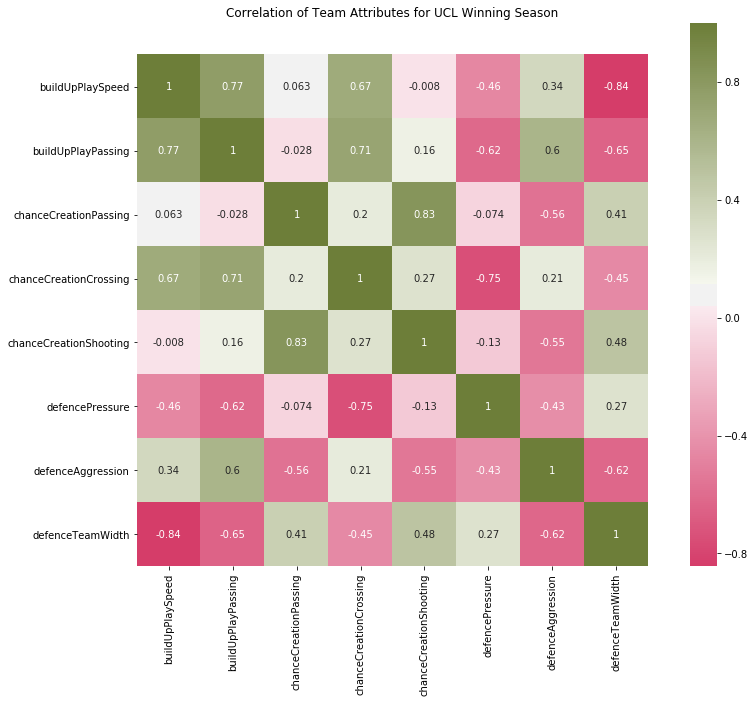

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(attrib_corr, cmap=sns.diverging_palette(0, 100, as_cmap=True), square=True, annot=True)
plt.ylim(len(attrib_corr), -0.5)
plt.title("Correlation of Team Attributes for UCL Winning Season")
plt.show

Through an analysis of the above heatmap, we can see that the Champions League winning teams found their success when: 
-	chanceCreationShooting and chanceCreationPassing had the highest correlation at 0.83
-	buildUpPlaySpeed and buildUpPlayPassing were highly correlated, which in theory makes sense as the faster a team can play the ball, the more they will be able to pass it around the field
-	buildUpPlayPassing and chanceCreationCrossing held the third highest correlation

## 4. Player Analysis

The last attribute of these teams that we will analyze will be that of their players. In order for a team to make it through a grueling season of multiple tournaments, their players have to be up for the task. Using the *player_attribs* data frame we will be able to analyze the sort of players that these teams require for success, and ultimately try to predict the sort of quality required by these players to make it onto one of these teams.

### Isolate Players for Winning Clubs 
In analyzing the player_attribs table, we can see that the table does not reference the teams for which the players play for. In order to match up the players according to their respective teams, we shall use the matches data frame (which contains player identifiers) and add them to our winning team players data frame

In [20]:
# To tidy up our data, we will concatinate the rows from our winning teams matches data frames
winners_matches = [bar09matches, int10matches, bar11matches, che12matches, 
                   bmu13matches, rea14matches, bar15matches, rea16matches]
winners_matches = pd.concat(winners_matches)
# We will also make a list of the team_api_ids in order to keep track of the appropriate teams
team_apis = [8634, 8636, 8455, 9823, 8633]
winners_matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
21520,21521,21518,21518,2008/2009,1,2008-08-31 00:00:00,530086,8388,8634,1,...,33988.0,30661.0,30740.0,30738.0,39854.0,36615.0,30955.0,30981.0,33639.0,30626.0
21534,21535,21518,21518,2008/2009,10,2008-11-08 00:00:00,530240,8634,10281,6,...,37597.0,37672.0,38065.0,2790.0,33586.0,33588.0,33820.0,75192.0,33729.0,39142.0
21546,21547,21518,21518,2008/2009,11,2008-11-16 00:00:00,530252,8479,8634,0,...,33988.0,30740.0,37482.0,30661.0,154257.0,36615.0,39854.0,30981.0,33639.0,30626.0
21549,21550,21518,21518,2008/2009,12,2008-11-23 00:00:00,530255,8634,8305,1,...,37473.0,32675.0,37427.0,37468.0,41156.0,27420.0,37471.0,37461.0,37474.0,37469.0
21563,21564,21518,21518,2008/2009,13,2008-11-29 00:00:00,530329,8302,8634,0,...,33988.0,30740.0,37482.0,30661.0,39854.0,36615.0,26146.0,30981.0,33639.0,30626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24512,24513,21518,21518,2015/2016,5,2015-09-23 00:00:00,2030127,8315,8633,1,...,282674.0,25921.0,230982.0,28467.0,191315.0,239219.0,31097.0,95078.0,30893.0,26166.0
24522,24523,21518,21518,2015/2016,6,2015-09-26 00:00:00,2030137,8633,9864,0,...,104382.0,18520.0,41707.0,41470.0,238841.0,39198.0,261599.0,215927.0,683450.0,46120.0
24531,24532,21518,21518,2015/2016,7,2015-10-04 00:00:00,2030146,9906,8633,1,...,282674.0,230982.0,30962.0,28467.0,95078.0,208494.0,31097.0,191315.0,26166.0,30893.0
24541,24542,21518,21518,2015/2016,8,2015-10-17 00:00:00,2030156,8633,8581,3,...,477472.0,105351.0,282473.0,37484.0,184091.0,25462.0,364244.0,513086.0,303088.0,476769.0


With a single dataframe to work with, we will now get the appropriate players from the winning clubs into the data frame that we will use for further analysis.

In [46]:
player_ids = []
temp_player_ids = []
for index, row in winners_matches.iterrows():
    # We will first see if our desired teams are the home or away team for this match
    if (row['home_team_api_id'] in team_apis):
        # Obtain the appropraite players from the match
        temp = row['home_player_1':'home_player_11']
        for i, val in temp.items():
            # Add the players to our list if they are not already present
            # Since some of the player ids in the matches table were represented by nan values, we will remove them
            if (val not in player_ids) & (str(val) != 'nan'):
                temp_player_ids.append(val)
        for val in temp_player_ids:
            player_ids.append(val)
    if (row['away_team_api_id'] in team_apis):
        temp = row['away_player_1':'away_player_11']
        for i, val in temp.items():
            if (val not in player_ids) & (str(val) != 'nan'):
                temp_player_ids.append(val)
        for val in temp_player_ids:
            player_ids.append(val)
    temp_player_ids = []
# We will also remove any possible duplicate player ids that may have snuck into our list
player_ids = list(dict.fromkeys(player_ids))

Now that we have all the corresponding players for the teams, we can now obtain their respective statistics from the player_attribs table

In [86]:
champ_players = pd.DataFrame()
for i in player_ids:
    for index, row in player_attribs.loc[player_attribs['player_api_id'] == i].iterrows():
        champ_players = champ_players.append(row)

### Predict Players on Teams Through Linear Regression 

The *player_attribs* dataframe contains all the information related to how EA sports ranks individual players for their FIFA video games. These ratings are based on meticulous analysis of their real life counterparts, where, as describe by [GOAL]( https://www.goal.com/en/news/fifa-player-ratings-explained-how-are-the-card-number-stats/1hszd2fgr7wgf1n2b2yjdpgynu), 
> “EA Sports employs a team of 25 EA Producers and 400 outside data contributors, who are led by Head of Data Collection & Licensing Michael Mueller-Moehring. This team is responsible for ensuring all player data is up to date, while a community of over 6,000 FIFA Data Reviewers or Talent Scouts from all over the world are constantly providing suggestions and alterations to the database.”

Utilizing this information, we can accurately predict the sort of players that were being monitored by these scouts during the seasons in question.

With all our players now in one place, we can perform our analysis and create our prediction model. We will be utilizing a linear regression model for this analysis, as there are multiple different categories to analyze for each player. 

When analyzing our *champ_players* dataframe, we can see that there are several categorical values within our data. In order for our algorithm to be able to have successful predictions, we will use the [one-hot encoding]( https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) technique to transform these categorical values into appropriate variables. Utilizing the following [resource]( https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/), we are able to alter the three columns which utilize categorical variables (preferred_foot, attacking_work_rate, defensive_work_rate).

In [89]:
# Sorce site: https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/

# Create the label encoder object that we will be using
le = preprocessing.LabelEncoder()
# We will replace the values in our dataframe that cannot be converted
conversion = lambda i : i or ''
champ_players['preferred_foot'] = [conversion(i) for i in champ_players['preferred_foot']]
champ_players['attacking_work_rate'] = [conversion(i) for i in champ_players['attacking_work_rate']]
champ_players['defensive_work_rate'] = [conversion(i) for i in champ_players['defensive_work_rate']]
try:
    champ_players['preferred_foot'] = le.fit_transform(champ_players['preferred_foot'])
    champ_players['attacking_work_rate'] = le.fit_transform(champ_players['attacking_work_rate'])
    champ_players['defensive_work_rate'] = le.fit_transform(champ_players['defensive_work_rate'])
except:
    print('Unable to convert')

With our data now ready, we can fit our linear regression model on the players. We will begin by splitting our data into a training and a test set and then fir our model.

In [117]:
# Since we will not be utilizing the date for our analysis, we will remove it from our dataframe
champ_players = champ_players.drop('date', axis =1)
# We will also replace the NaN values, as these are unable to be processed by the model
champ_players = champ_players.fillna(0)
# Since we are looking at predicting the overall quality of the players, we will drop their overall rating from the X set
X = champ_players.drop('overall_rating', axis =1)
y = champ_players['overall_rating']

# Split into training and test sets and fit the model
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.25)

# Fir our data and print the accuracy of model
regression = LinearRegression().fit(X_train, y_train)
print(regression.score(X_test, y_test))
# We will also print out the average of our test data to see the predicted overall rating
regression.predict(X_test).mean()

0.917679845696753


79.11711739028672

With a 91.77% accuracy, our model has predicted that the Champions League winning teams for the years 2009 – 2016 have had a squad of players with an overall rating of about 79. Since the overall player ratings are based on a 0 – 100 scale (0 being the worst while 100 is the perfect player), our predicted rating is on the upper end of the quality for the players featured in the game.

## 5. Conclusion

The Champions League has found its way towards the top of the priority list for the top European clubs, some of whom see it as a higher priority than even their domestic leagues. In our analysis of the seasons we found that the teams who won the Champions League mirrored their tournament success in their respective leagues. We were also able to find that for these seasons, our winning teams relied on a combination of team tactics, such as the rate of passes and the speed in which the team moves up the field with the ball, to find their favorable formula. Lastly, through a study of the players on these teams, we were able to create a machine learning algorithm that predicted that Champions League winning teams are composed of some of the most elite soccer players on the planet.

Seeing as we were only able to analyze eight of some of the most recent seasons of the tournament, some possible steps for the future, in expansion of this analysis, is to incorporate data from other iterations of the competition.

Thank you for reading!  

<img src="trophy.jpg" height="242">
image sorce: https://en.as.com/futbol/imagenes/2018/05/23/champions/1527065008_639803_1527065228_noticia_normal.jpg

If you would like to see further details on European Football, consult the following links:
-	https://www.uefa.com/uefachampionsleague/ 
    -	For further information on the Champions League, the premier European club tournament  
-	https://www.fifaindex.com/ 
    -	For player ratings and team information from the FIFA series of video games
-	https://www.transfermarkt.us/
    -	For in-depth analysis of players and their current values on the transfer market
